In [ ]:
# Import library
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix,accuracy_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Connect drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Breast Cancer Wisconsin.csv',  index_col= None, na_values='?')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# Menghapus kolom yang tidak diperlukan
df.drop('id', axis=1 , inplace=True)
df.drop('Unnamed: 32', axis=1 , inplace=True)

In [ ]:
# Menghitung data di kolom 'diagnosis'
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64


*   Benignant(B) = Jinak
*   Malignant(M) = Ganas



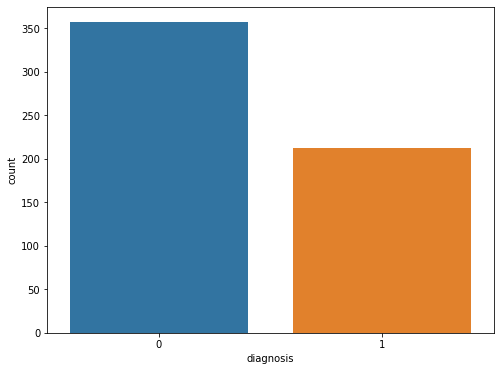

In [ ]:
# Transformasi categorical data menjadi numerical data
le=LabelEncoder()
df['diagnosis']=le.fit_transform(df['diagnosis'])

# Visualisasi data 'diagnosis'
plt.figure(figsize = (8,6))
sns.countplot(x = 'diagnosis', data = df)

In [ ]:
# Menghapus kolom 'diagnosis'
y=df['diagnosis']
X=df.drop(['diagnosis'],axis=1)

In [ ]:
# Data x
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Data y
# y = 'diagnosis'
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
# Feature Selection -> SFS (Step forward feature selection) dengan Random Forest Classifier
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1),
         k_features = 7,
          forward= True,
          floating = False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X, y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.3s finished

[2021-07-02 01:40:06] Features: 1/7 -- score: 0.8840367379099773[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   20.9s finished

[2021-07-02 01:40:27] Features: 2/7 -- score: 0.9507780951442923[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:   19.6s finished

[2021-07-02 01:40:47] Features: 3/7 -- score: 0.9648872254506058[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   19.7s finished

[2021-07-02 01:41:06] Features: 4/7 -- score: 0.9701442923273909[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:   18.5s finished

[202

In [ ]:
# Menampilkan data setelah sfs
sfs.k_feature_names_

('area_mean',
 'radius_se',
 'symmetry_se',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst',
 'symmetry_worst')

In [ ]:
# Membuat data baru hasil dari sfs
data_fs = list (sfs.k_feature_names_)
data_fs

['area_mean',
 'radius_se',
 'symmetry_se',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst',
 'symmetry_worst']

In [ ]:
# Data x baru
X[data_fs]

,area_mean,radius_se,symmetry_se,texture_worst,perimeter_worst,smoothness_worst,symmetry_worst
0,1001.0,1.0950,0.03003,17.33,184.60,0.16220,0.4601
1,1326.0,0.5435,0.01389,23.41,158.80,0.12380,0.2750
2,1203.0,0.7456,0.02250,25.53,152.50,0.14440,0.3613
3,386.1,0.4956,0.05963,26.50,98.87,0.20980,0.6638
4,1297.0,0.7572,0.01756,16.67,152.20,0.13740,0.2364
...,...,...,...,...,...,...,...
564,1479.0,1.1760,0.01114,26.40,166.10,0.14100,0.2060
565,1261.0,0.7655,0.01898,38.25,155.00,0.11660,0.2572
566,858.1,0.4564,0.01318,34.12,126.70,0.11390,0.2218
567,1265.0,0.7260,0.02324,39.42,184.60,0.16500,0.4087


In [ ]:
# Membagi Data Training dan Data Testing
x_train, x_test, y_train, y_test = train_test_split(X[data_fs], y, test_size = 0.2, random_state = 0)

In [ ]:
# Normalisasi Data
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# Model Ann Binery Classification

# Membuat model ann sequential
ann = tf.keras.models.Sequential()

# Hidden layer 1 | 30 neurons | fungsi aktivasi = relu THE INPUT LAYER WILL BE ADDED AUTOMATICALLY,
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5)) # Dropout untuk 

# Hidden layer 2 | 30 neurons | fungsi aktivasi = relu
ann.add(tf.keras.layers.Dense(units = 30,activation = 'relu'))
ann.add(Dropout(0.5))

# Output layer | 1 neuron | fungsi aktivasi = sigmoid | Binary Classification
ann.add(tf.keras.layers.Dense(units = 1,activation = 'sigmoid'))

# Optimizer = Adam
# Loss function = Binary Crossentropy
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Callbacks untuk akurasi maksimum
from tensorflow.keras.callbacks import EarlyStopping
early = EarlyStopping(monitor = 'accuracy', mode = 'max',patience = 25)

In [ ]:
#Training Data
#Batch loading | Batch size = 32 | epoch = 400
ann.fit(x_train, y_train,batch_size = 32, epochs = 400,callbacks = [early])

Epoch 1/400
15/15 [==============================] - 1s 1ms/step - loss: 0.6851 - accuracy: 0.5516
Epoch 2/400
15/15 [==============================] - 0s 1ms/step - loss: 0.6547 - accuracy: 0.6967
Epoch 3/400
15/15 [==============================] - 0s 1ms/step - loss: 0.6513 - accuracy: 0.7055
Epoch 4/400
15/15 [==============================] - 0s 1ms/step - loss: 0.6387 - accuracy: 0.7231
Epoch 5/400
15/15 [==============================] - 0s 1ms/step - loss: 0.6205 - accuracy: 0.7429
Epoch 6/400
15/15 [==============================] - 0s 1ms/step - loss: 0.5928 - accuracy: 0.7626
Epoch 7/400
15/15 [==============================] - 0s 1ms/step - loss: 0.5887 - accuracy: 0.7736
Epoch 8/400
15/15 [==============================] - 0s 1ms/step - loss: 0.5545 - accuracy: 0.7868
Epoch 9/400
15/15 [==============================] - 0s 2ms/step - loss: 0.5470 - accuracy: 0.7758
Epoch 10/400
15/15 [==============================] - 0s 2ms/step - loss: 0.5090 - accuracy: 0.8220
Epoch 11/

In [ ]:
# Evaluasi Model
ann.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9825


[0.06256318837404251, 0.9824561476707458]

In [ ]:
# Akurasi Data dan Confussion Matrix
y_pred = ann.predict(x_test)
y_pred  = y_pred > 0.5
cm = confusion_matrix(y_pred,y_test)
ac = accuracy_score(y_pred,y_test)

Accuracy - 98.24561403508771%


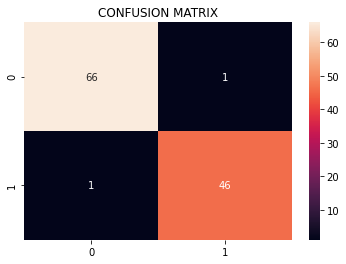

In [ ]:
sns.heatmap(cm,annot = True)
plt.title('CONFUSION MATRIX')
print('Accuracy - {}%'.format(ac*100))

**Akurasi Data : 98.24561403508771%**

**Confusion Matrix :**
*   True Positive (TP) = 47
*   True Negative(TN) = 65
*   False Positive(FP) = 2
*   False Negative (FN) = 0

In [ ]:
# Prediksi Data Classification

prediksi = [[1000,1,0.01,18,130,0.16,0.3]]
sc_pred = sc.transform(prediksi)
diagnosis = ann.predict(sc_pred)

print("Data Pasien = ", prediksi)
if diagnosis <= [0.5]:
  hasil = "Benignant / Jinak"
elif diagnosis >= [0.51]:
  hasil = "Malignant / Ganas"
print("Data Pasien Tersebut menunjukkan kanker payudara yang kemungkinan bersifat : ", hasil)


Data Pasien =  [[1000, 1, 0.01, 18, 130, 0.16, 0.3]]
Data Pasien Tersebut menunjukkan kanker payudara yang kemungkinan bersifat :  Malignant / Ganas
